<a href="https://colab.research.google.com/github/LCaravaggio/ClaseFelicidad_Maestria/blob/main/WHR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 113MB/s]


In [ ]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [ ]:
df = pd.read_csv('/content/2019.csv')

In [ ]:
df.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
import plotly.express as px

fig = px.bar(df.sort_values('Score',ascending=False)[:20].sort_values('Score') ,y='Country or region',
             x='Score', title='Los 20 países más felices',orientation='h',height=600)
fig.show()

In [ ]:
fig = px.bar(df.sort_values('Score')[:20].sort_values('Score') ,y='Country or region',
             x='Score', title='Los 20 países menos felices',orientation='h',height=600)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ["Perceptions of corruption", "Healthy life expectancy", "Social support",
       "GDP per capita", "Freedom to make life choices", "Generosity"]
nrows = 3
ncols = 2

fig = make_subplots(rows=nrows, cols=ncols,subplot_titles=cols)
print('Correlations:')
for index,col in enumerate(cols):
    fig.add_trace(go.Scatter(x=df[col], y=df['Score'],mode='markers',
                            customdata = df['Country or region'],
                            hovertemplate="<br>".join(["Index: %{x}",
                                                       "Score: %{y}",
                                                       "Country: %{customdata}"])),
                  row=index//ncols+1, col=(index%ncols)+1)
    corr = df['Score'].corr(df[col])
    print('{}: {:.2}'.format(col,corr))

fig.update_layout(height=900, width=800, title_text="Felicidad y Otras variables")

fig.show()

Correlations:
Perceptions of corruption: 0.39
Healthy life expectancy: 0.78
Social support: 0.78
GDP per capita: 0.79
Freedom to make life choices: 0.57
Generosity: 0.076


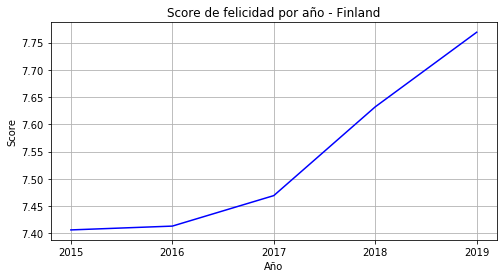

In [ ]:
import matplotlib.pyplot as plt

df2019=pd.read_csv("/content/2019.csv")
df2018=pd.read_csv("/content/2018.csv")
df2017=pd.read_csv("/content/2017.csv")
df2016=pd.read_csv("/content/2016.csv")
df2015=pd.read_csv("/content/2015.csv")

pais="Finland"

Score2015=df2015[df2015['Country']==pais]["Happiness Score"]
Score2016=df2016[df2016['Country']==pais]["Happiness Score"]
Score2017=df2017[df2017['Country']==pais]["Happiness.Score"]
Score2018=df2018[df2018['Country or region']==pais]["Score"]
Score2019=df2019[df2019['Country or region']==pais]["Score"]

y=np.array([Score2015,Score2016,Score2017,Score2018,Score2019])

fig,axes=plt.subplots(figsize=(8,4))

years=[2015,2016,2017,2018,2019]
x=np.array(years)
plt.xticks(x, x)

axes.grid(True)
axes.set_title("Score de felicidad por año - " + pais)
axes.set_ylabel("Score")
axes.set_xlabel("Año")
axes.plot(x,y,color="blue")

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

fig = px.choropleth(df, locations='Country or region',
                    locationmode = "country names",
                    color="Score",
                    hover_name = 'Country or region',
                    hover_data={'Country or region':True,
                                'Score': True
                               }
                   )
fig.update_layout(width=800, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()